<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b>LLM GTP - Sentiment analysis mental health</b></div>

<div align="center">
    <img src="https://img.freepik.com/vetores-gratis/historias-instagram-de-saude-mental-plana_23-2149036130.jpg?t=st=1733939159~exp=1733942759~hmac=5336cb5f0d86a8d81d998d3e3cd5fe0e01184d183decc4cf24da40a5c61a0127&w=740" />
</div>



### **Objective:**
To enhance the capabilities of GPT-2 through prompt engineering for improved sentiment analysis in mental health contexts.

### **Problem Statement:**
Given a dataset of statements tagged with mental health statuses (Normal, Depression, Suicidal, Anxiety, Stress, Bi-Polar, Personality Disorder), the goal is to develop a model that can better understand and classify these sentiments. Traditional fine-tuning methods can be supplemented with prompt engineering to improve model performance and accuracy.

### **Steps to Implement the Project:**

1. **Data Preprocessing**:
   - **Text Cleaning**: Remove unnecessary characters, punctuation, and perform other preprocessing steps to ensure the text is clean and consistent.
   - **Tokenization**: Tokenize the text data to prepare it for model training.

2. **Prompt Engineering**:
   - **Creating Effective Prompts**: Develop tailored prompts that guide GPT-2 to generate more relevant and context-aware responses. This involves providing explicit instructions or cues to the model about the expected mental health sentiment classification.
   - **Contextual Examples**: Include examples of statements from the dataset that the model can learn from. These examples help the model understand the kind of responses required for different mental health statuses.
   - **Task-Specific Prompt Templates**: Design templates that reframe the task to make it easier for GPT-2 to understand the sentiment being conveyed in the statements. For example, using templates like "Given this statement, classify it as: Normal, Depression, Suicidal, Anxiety, Stress, Bi-Polar, or Personality Disorder."

3. **Model Training**:
   - **Fine-tuning**: Train GPT-2 with the preprocessed data and the engineered prompts. Use the dataset to fine-tune the model, leveraging the contextual examples and prompt templates to guide its learning.
   - **Hyperparameter Optimization**: Experiment with different learning rates, batch sizes, and epochs to find the optimal setup for training the model.

4. **Evaluation**:
   - **Metrics**: Evaluate the model using metrics such as accuracy, precision, recall, F1-score, and loss to assess its performance on the test set.
   - **Confusion Matrix**: Analyze the confusion matrix to understand common errors made by the model and identify where prompt engineering could be further improved.
   - **User Feedback**: Gather feedback from users interacting with a chatbot or application utilizing the model to refine and improve the prompts further.

5. **Deployment**:
   - **Integrating the Model**: Integrate the model into a real-world application like a mental health chatbot or a web-based tool. The integration should take advantage of the engineered prompts to provide more accurate and contextually relevant responses.
   - **Continuous Monitoring and Refinement**: Monitor the model’s performance in the deployment environment, collecting additional data and user feedback to continuously refine the prompts and model.

### **Expected Outcomes:**
- A GPT-2 model with enhanced performance through effective prompt engineering, resulting in improved accuracy in classifying mental health statuses.
- A deployable mental health chatbot that utilizes the engineered prompts for better user interaction and support.
- Insights into the effectiveness of different prompt engineering strategies for sentiment analysis tasks.

This project showcases the potential of integrating prompt engineering with LLMs like GPT-2 to achieve more accurate and context-aware sentiment analysis in the mental health domain.for mental health support and research.

In [3]:
# Installing packages
!pip install transformers torch

Defaulting to user installation because normal site-packages is not writeable


In [4]:
# Import of libraries

# System libraries
import re
import string
import unicodedata
import itertools
from collections import Counter

# Library for file manipulation
import pandas as pd
import numpy as np
import pandas

# Data visualization
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt

# Configuration for graph width and layout
sns.set_theme(style='whitegrid')
palette='viridis'

# Library LLM
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Warnings remove alerts
import warnings
warnings.filterwarnings("ignore")

# Python version
from platform import python_version
print('Python version in this Jupyter Notebook:', python_version())

Python version in this Jupyter Notebook: 3.12.7


# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Part 2 - Database</b></div>

In [5]:
# Database
train_df = pd.read_csv("Combined Data.csv", nrows=1000)
train_df = train_df[["statement", "status"]]

# Viewing dataset
train_df

statement   status
0                                           oh my gosh  Anxiety
1    trouble sleeping, confused mind, restless hear...  Anxiety
2    All wrong, back off dear, forward doubt. Stay ...  Anxiety
3    I've shifted my focus to something else but I'...  Anxiety
4    I'm restless and restless, it's been a month n...  Anxiety
..                                                 ...      ...
995                                     please make it   Normal
996                                     Okay then okay   Normal
997                                     My pain is big   Normal
998                  My whole life is full of surprise   Normal
999  I want to ask, does it take a really long time...   Normal

[1000 rows x 2 columns]

In [6]:
# Viewing first 5 data
train_df.head()

statement   status
0                                         oh my gosh  Anxiety
1  trouble sleeping, confused mind, restless hear...  Anxiety
2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3  I've shifted my focus to something else but I'...  Anxiety
4  I'm restless and restless, it's been a month n...  Anxiety

In [7]:
# Viewing 5 latest data
train_df.tail()

statement  status
995                                     please make it  Normal
996                                     Okay then okay  Normal
997                                     My pain is big  Normal
998                  My whole life is full of surprise  Normal
999  I want to ask, does it take a really long time...  Normal

In [8]:
# Info data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  997 non-null    object
 1   status     1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [9]:
# Type data
train_df.dtypes

statement    object
status       object
dtype: object

In [10]:
# Viewing rows and columns
train_df.shape

(1000, 2)

# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Part 3 - Preprocessing</b></div>

In [11]:
print("Checking for missing values in each column:")
print(train_df.isnull().sum())

Checking for missing values in each column:
statement    3
status       0
dtype: int64


In [12]:
# Count the number of rows in the 'text' column
line_count = train_df['statement'].count()  # Counts non-null rows
total_count = len(train_df['statement'])  # Counts total rows, including nulls

# Display the results
print(f"Number of non-null rows in the 'text' column: {line_count}")
print(f"Total number of rows in the 'text' column: {total_count}")


Number of non-null rows in the 'text' column: 997
Total number of rows in the 'text' column: 1000


In [13]:
# Calculating the total number of NaN values in each column of the DataFrame 'nlp_df'
nan_counts = train_df.isna().sum()
nan_counts

statement    3
status       0
dtype: int64

In [14]:
# Calculating the total number of NaN values in the 'review_comment_message' column of 'nlp_df'
nan_count_review_comment_message = train_df['statement'].isna().sum()
nan_count_review_comment_message

3

In [15]:
def remove_duplicates_nlp_df(train_df, column_name='text'):
    
    # Remove duplicates based on the specified column, keeping the first occurrence
    depression_df = train_df.drop_duplicates(subset=[column_name], keep='first').reset_index(drop=True)
    
    # Display the total entries after removing duplicates
    print(f"Total entries after removing duplicates in '{column_name}': {depression_df.shape[0]}")
    
    return depression_df

# Remove duplicates from 'depression_df' based on the 'text' column
train_df = remove_duplicates_nlp_df(train_df, 'statement')

# Display the first few records to verify
train_df.head(25)

Total entries after removing duplicates in 'statement': 980


statement   status
0                                          oh my gosh  Anxiety
1   trouble sleeping, confused mind, restless hear...  Anxiety
2   All wrong, back off dear, forward doubt. Stay ...  Anxiety
3   I've shifted my focus to something else but I'...  Anxiety
4   I'm restless and restless, it's been a month n...  Anxiety
5   every break, you must be nervous, like somethi...  Anxiety
6   I feel scared, anxious, what can I do? And may...  Anxiety
7     Have you ever felt nervous but didn't know why?  Anxiety
8   I haven't slept well for 2 days, it's like I'm...  Anxiety
9                  I'm really worried, I want to cry.  Anxiety
10  always restless every night, even though I don...  Anxiety
11  I'm confused, I'm not feeling good lately. Eve...  Anxiety
12  sometimes what is needed when there is a probl...  Anxiety
13                         Because this worry is you.  Anxiety
14  Sometimes it's your own thoughts that make you...  Anxiety
15  Every time I wake up, I'm definitely nervous a...  Anxiety
16  I can only hope, even though I'm worried if it...  Anxiety
17                       restive = restless, restless  Anxiety
18  "No regrets or grudges/angry at things that ha...  Anxiety
19  If the guy is sick, the girl actually feels si...  Anxiety
20  I've been the most anxious person before I bec...  Anxiety
21  Successfully online at 9am. Even sleeping in a...  Anxiety
22               Can't sleep. Just restless by nature  Anxiety
23         Already worried about picking up the phone  Anxiety
24  a little restless. a little restless. always f...  Anxiety

In [16]:
# Remove duplicate entries in the 'text' column
depression_df = train_df.drop_duplicates(subset='statement')

# Remove blank or null entries in the 'text' column
depression_df = train_df[train_df['statement'].str.strip().astype(bool)]

# Display the total number of rows after cleaning
print(f"Number of rows after cleaning: {len(train_df)}")

Number of rows after cleaning: 980


# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Part 4 - Data cleaning</b></div>

In [17]:
# Importing regular expressions module
import re  

def clean_text(text):
    """
    Cleans the text by removing whitespace, punctuation, and converting to lowercase.
    """
    if isinstance(text, str):  # Checks if the text is a string
        # Convert to lowercase
        text = text.lower()
        
        # Remove punctuation
        text = re.sub(r'[^\w\s]', '', text)  # Removes punctuation
        
        # Remove numbers
        text = re.sub(r'\d+', '', text)  # Removes numbers
        
        # Remove extra whitespace
        text = ' '.join(text.split())
        return text
    else:
        return ''  # Returns an empty string if not a string

# Apply the cleaning function to the 'text' column
train_df['cleaned_text'] = depression_df['statement'].apply(clean_text)

# Display the first entries to verify cleaning
train_df[['statement', 'cleaned_text']].head(55)


statement  \
0                                          oh my gosh   
1   trouble sleeping, confused mind, restless hear...   
2   All wrong, back off dear, forward doubt. Stay ...   
3   I've shifted my focus to something else but I'...   
4   I'm restless and restless, it's been a month n...   
5   every break, you must be nervous, like somethi...   
6   I feel scared, anxious, what can I do? And may...   
7     Have you ever felt nervous but didn't know why?   
8   I haven't slept well for 2 days, it's like I'm...   
9                  I'm really worried, I want to cry.   
10  always restless every night, even though I don...   
11  I'm confused, I'm not feeling good lately. Eve...   
12  sometimes what is needed when there is a probl...   
13                         Because this worry is you.   
14  Sometimes it's your own thoughts that make you...   
15  Every time I wake up, I'm definitely nervous a...   
16  I can only hope, even though I'm worried if it...   
17                       restive = restless, restless   
18  "No regrets or grudges/angry at things that ha...   
19  If the guy is sick, the girl actually feels si...   
20  I've been the most anxious person before I bec...   
21  Successfully online at 9am. Even sleeping in a...   
22               Can't sleep. Just restless by nature   
23         Already worried about picking up the phone   
24  a little restless. a little restless. always f...   
25           I've been so restless since this morning   
26                         it makes you feel restless   
27                 Sleepy but restless when you sleep   
28  Why is this cave... I'm already in a bad mood ...   
29  He is very busy, He is restless, geez, what's ...   
30  I'm broken and fragile, I'm hurt, I can't stan...   
31  # Suggest a song that makes you calm, don't kn...   
32                            Terooosss nervous huuuu   
33  why today's heart doesn't feel good..jealous?....   
34  It's a habit from elementary school if I think...   
35  Since yesterday yesterday, I have not been in ...   
36  Tonight he continues to chatter about money, I...   
37                        Feeling so restless lately.   
38                                Oh god I'm restless   
39  but my heart is still restless even though my ...   
40         waiting for uncertainty, please be anxious   
41  been the most anxious person, before becoming ...   
42  Did you ever read it when you read it to RL, I...   
43  Hi, I want to tell you... Lately I've been fee...   
44  I've been feeling restless for the past few da...   
45  Oh no I'm restless. The time will come. I walk...   
46   Controlling anxiety is not as easy as it sounds.   
47  Since the pandemic, I haven't opened my laptop...   
48  People who are restless and afraid can be seen...   
49  I don't know if my mind breaks down, but I don...   
50        Sensitive feelings make the heart restless.   
51                 Let's not be nervous, how about ™‚   
52          after being confessed, I'm really nervous   
53                        Restless.. and.. restless..   
54  This is the first time I've had an anxiety dis...   

                                         cleaned_text  
0                                          oh my gosh  
1   trouble sleeping confused mind restless heart ...  
2   all wrong back off dear forward doubt stay in ...  
3   ive shifted my focus to something else but im ...  
4   im restless and restless its been a month now ...  
5   every break you must be nervous like something...  
6   i feel scared anxious what can i do and may my...  
7       have you ever felt nervous but didnt know why  
8   i havent slept well for days its like im restl...  
9                     im really worried i want to cry  
10  always restless every night even though i dont...  
11  im confused im not feeling good lately every t...  
12  sometimes what is needed when there is a probl...  
13                          because this worry is you  
14  sometim

In [18]:
# Checking for missing values in each column
print("Checking for missing values in each column:")
print(train_df.isnull().sum())

Checking for missing values in each column:
statement       1
status          0
cleaned_text    0
dtype: int64


In [19]:
train_df

statement   status  \
0                                           oh my gosh  Anxiety   
1    trouble sleeping, confused mind, restless hear...  Anxiety   
2    All wrong, back off dear, forward doubt. Stay ...  Anxiety   
3    I've shifted my focus to something else but I'...  Anxiety   
4    I'm restless and restless, it's been a month n...  Anxiety   
..                                                 ...      ...   
975                                     please make it   Normal   
976                                     Okay then okay   Normal   
977                                     My pain is big   Normal   
978                  My whole life is full of surprise   Normal   
979  I want to ask, does it take a really long time...   Normal   

                                          cleaned_text  
0                                           oh my gosh  
1    trouble sleeping confused mind restless heart ...  
2    all wrong back off dear forward doubt stay in ...  
3    ive shifted my focus to something else but im ...  
4    im restless and restless its been a month now ...  
..                                                 ...  
975                                     please make it  
976                                     okay then okay  
977                                     my pain is big  
978                  my whole life is full of surprise  
979  i want to ask does it take a really long time ...  

[980 rows x 3 columns]

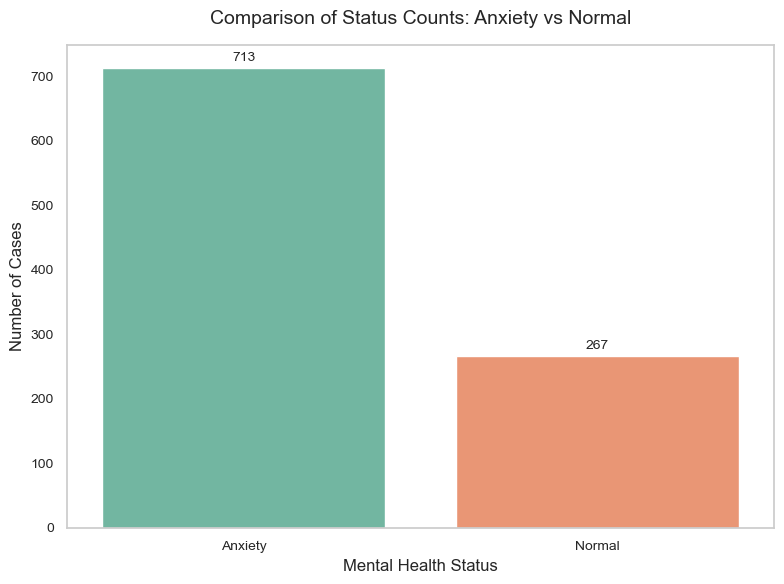

In [20]:
# Create the countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=train_df, x="status", palette="Set2")

# Add title and labels
plt.title("Comparison of Status Counts: Anxiety vs Normal", fontsize=14, pad=15)
plt.xlabel("Mental Health Status", fontsize=12)
plt.ylabel("Number of Cases", fontsize=12)

# Annotate bar values
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., 
            p.get_height() + 10, 
            int(p.get_height()), 
            ha="center", fontsize=10)

# Adjust styling and layout
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Show or save the plot
# Optional: Save high-resolution image
plt.savefig("status_countplot.png", dpi=300)
plt.grid(False)
plt.show()

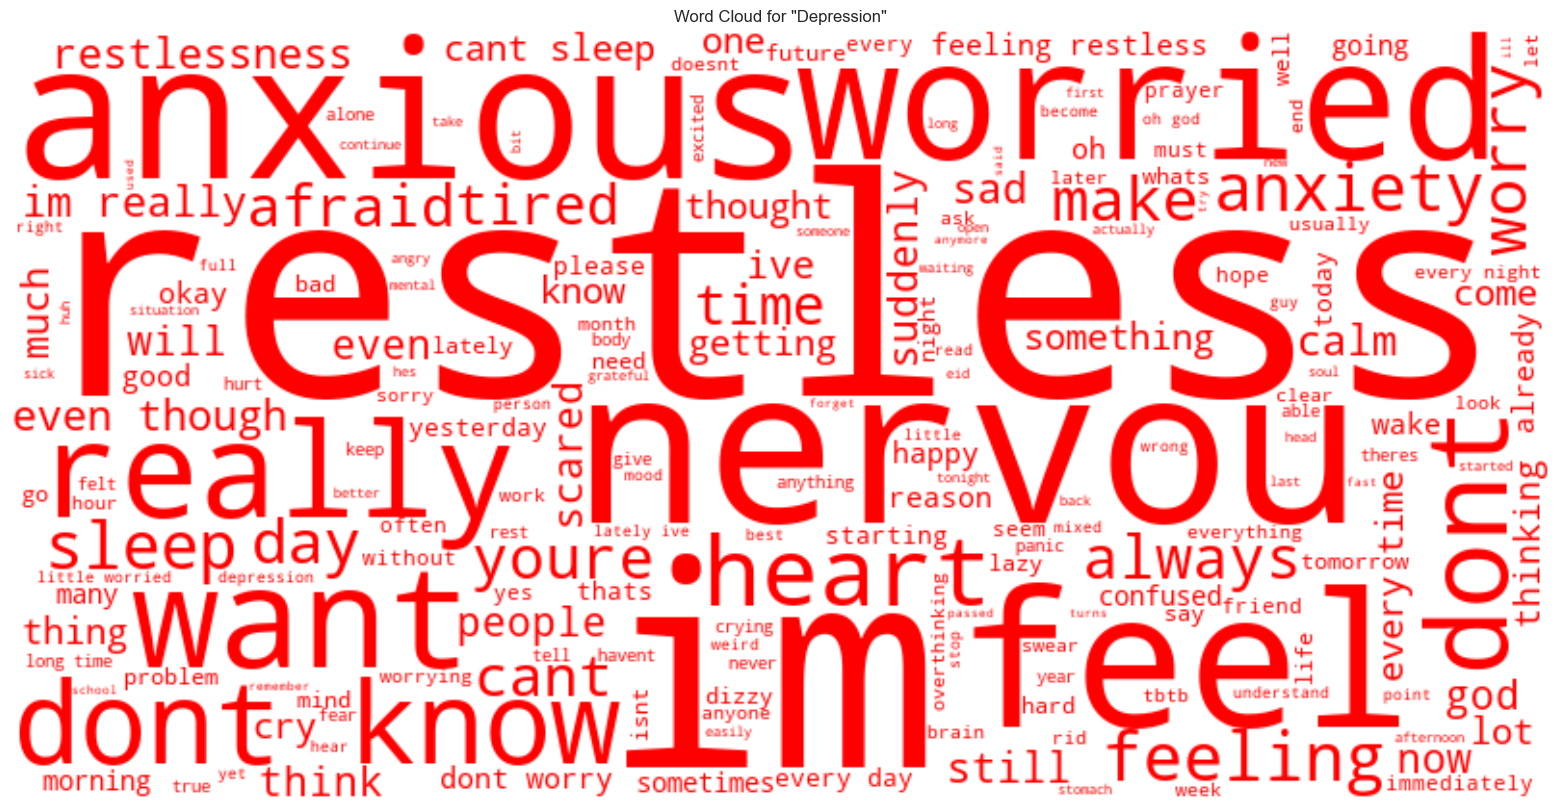

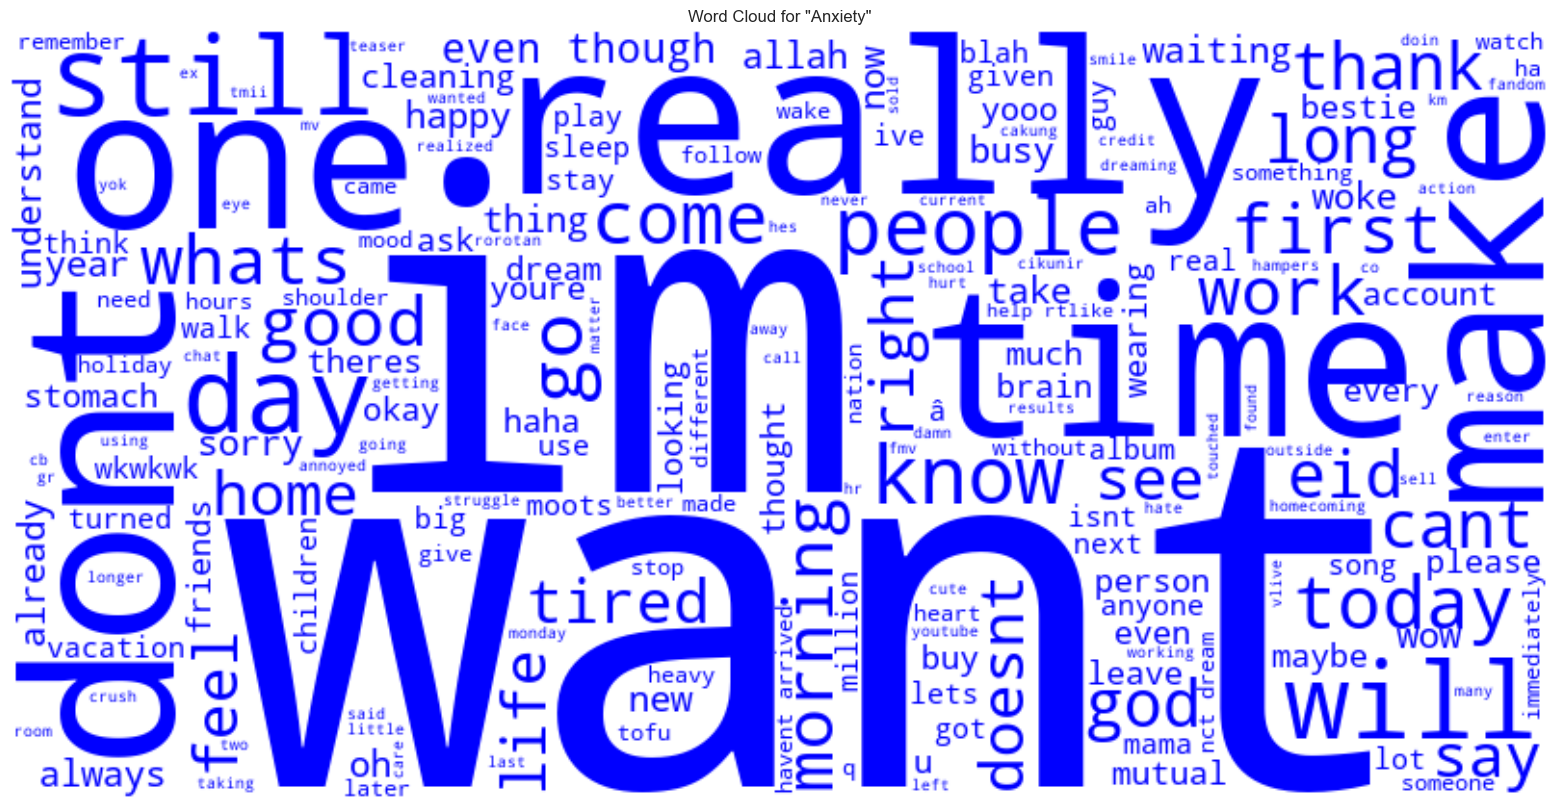

In [21]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

# Filter results for the topics 'depression' and 'anxiety'
depression_texts = train_df[train_df['status'] == 'Anxiety']['cleaned_text']
anxiety_texts = train_df[train_df['status'] == 'Normal']['cleaned_text']

# Function to generate a word cloud for a specific topic
def generate_wordcloud(text, color_func, title):
    wordcloud = WordCloud(width=800, height=400,
                          background_color='white',
                          stopwords=STOPWORDS,
                          color_func=color_func).generate(text)

    plt.figure(figsize=(20.5, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Concatenate the texts into a single string for each topic
depression_text = ' '.join(depression_texts)
anxiety_text = ' '.join(anxiety_texts)

# Generate the word cloud for 'depression' with a red theme
generate_wordcloud(depression_text, 
                   color_func=lambda *args, **kwargs: 'red', 
                   title='Word Cloud for "Depression"')

# Generate the word cloud for 'anxiety' with a blue theme
generate_wordcloud(anxiety_text, 
                   color_func=lambda *args, **kwargs: 'blue', 
                   title='Word Cloud for "Anxiety"')

# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Part 5 - Model LLM</b></div>

In [22]:
# Importing PyTorch and the necessary GPT-2 model and tokenizer
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Check if a GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load the model and tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2").to(device)  # Move model to GPU

# Example input
input_text = "Hello, how are you?"
inputs = tokenizer.encode(input_text, return_tensors="pt").to(device)  # Move input to GPU

# Generate output
with torch.no_grad():
    outputs = model.generate(inputs, max_length=50)

# Decode output
output_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(output_text)

Using device: cpu


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Hello, how are you?

I'm a little bit of a nerd. I'm a big nerd. I'm a big nerd. I'm a big nerd. I'm a big nerd. I'm a big nerd. I'm a


In [23]:
import torch

# Create a tensor on the CPU
x = torch.randn(10, 10)

# Move the tensor to a GPU device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
x = x.to(device)  # or x.to('cuda')

# Move the tensor back to CPU
x = x.to('cpu')

In [24]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load the model and tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2").to(device)  # Move model to GPU

In [25]:
import torch

# Create a tensor on the CPU
x = torch.randn(10, 10)

# Move the tensor to the default GPU
x = x.cuda()

# Move the tensor back to CPU
x = x.cpu()

AssertionError: Torch not compiled with CUDA enabled

In [27]:
# Check if a GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [28]:
# Importing PyTorch and the necessary GPT-2 model and tokenizer
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Check if a GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [29]:
# Model selection
# Options include "gpt2-medium", "gpt2-large", "gpt2-xl"
model_name = "gpt2"  

# Load the pre-trained model
model = GPT2LMHeadModel.from_pretrained(model_name)

# Move the model to the GPU (if available)
model = model.to(device)
model

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [30]:
# Load the tokenizer for the model
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

# Adjust the pad_token_id to avoid warnings
tokenizer.pad_token = tokenizer.eos_token

# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Part 6 - Example prompt for GPT-2</b></div>

In [31]:
def generate_related_words(text, topic, max_new_tokens=50):
    if len(text.split()) < 3:
        return "Input text is too short for meaningful analysis."

    # Create the prompt to generate related words or phrases based on the input text and topic
    prompt = (
        f"Text: \"{text}\"\n"
        f"Topic: {topic}\n"
        f"List specific words or phrases related to the topic '{topic}', "
        f"focusing on emotions, symptoms, or situations. Avoid generic responses or repetition.\n\n"
        f"Related words:"
    )

    # Tokenize the prompt and move the inputs to the appropriate device (GPU or CPU)
    inputs = tokenizer(prompt, return_tensors="pt")
    inputs = {key: value.to(device) for key, value in inputs.items()}

    # Generate related words using the model
    outputs = model.generate(
        inputs["input_ids"],
        attention_mask=inputs["attention_mask"],
        max_new_tokens=max_new_tokens,
        temperature=0.5,
        top_k=100,
        top_p=0.9,
        do_sample=True,
        repetition_penalty=1.2,
        pad_token_id=tokenizer.pad_token_id,
    )
    
    return tokenizer.decode(outputs[0], skip_special_tokens=True).replace(prompt, "").strip()

# Example usage of the function
text = "trouble sleeping confused mind restless heart all out of tune"

# Set the topic
topic = "anxiety"

# Generate related words or phrases
generated_text = generate_related_words(text, topic)

# Output the generated text
print(f"Generated Text: {generated_text}")

Generated Text: (1) Panic Disorder - Anxiety and Depression [English] / http://www .gravatar.com/en-us/?lang=eng&id=113061 The word panic is used by many people as a synonym for


# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Part 7 - Prompt engineering in dataset</b></div>

In [32]:
# Function to generate related words based on input text and topic
def generate_related_words(text, topic, max_new_tokens=50, temperature=0.7, top_k=50, top_p=0.95):
    # Create the prompt for generating related words
    prompt = (
        f"Text: {text}\n"
        f"Identify words or phrases related to the topic '{topic}', such as "
        f"emotions, symptoms, or situations. Examples include sadness, "
        f"isolation, worry, or other relevant words.\n\nRelated words:"
    )
    # Tokenize the prompt
    inputs = tokenizer(prompt, return_tensors="pt")

    # Adjust pad_token_id to avoid warnings
    tokenizer.pad_token = tokenizer.eos_token

    # Ensure model and inputs are on the same device (GPU or CPU)
    inputs = {key: value.to(device) for key, value in inputs.items()}

    # Generate related words using the model
    outputs = model.generate(
        inputs["input_ids"],
        attention_mask=inputs["attention_mask"],
        max_new_tokens=max_new_tokens,
        temperature=temperature,
        top_k=top_k,
        top_p=top_p,
        do_sample=True,
        pad_token_id=tokenizer.eos_token_id,
    )
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

In [33]:
%%time

# List of texts (replace with your original DataFrame)
texts = train_df["cleaned_text"].dropna().tolist()

# Topics for analysis
topics = ["depression", "anxiety"]

# List to store the results
results = []

# Generate related words for each text
for idx, text in enumerate(texts):
    print(f"\nProcessing text {idx + 1}/{len(texts)}")  # Progress indicator
    for topic in topics:
        print(f"Analyzing topic: {topic}")
        generated = generate_related_words(text, topic)
        print(f"Original Text: {text}")
        print(f"Generated Text for {topic}: {generated}\n")
        
        # Store the result
        results.append({"original_text": text,
                        "topic": topic,
                        "generated_text": generated})


Processing text 1/980
Analyzing topic: depression
Original Text: oh my gosh
Generated Text for depression: Text: oh my gosh
Identify words or phrases related to the topic 'depression', such as emotions, symptoms, or situations. Examples include sadness, isolation, worry, or other relevant words.

Related words: fear, anxiety, depression

Identify a category or word associated with the subject, including a category or word, which can be used to describe the subject.

Related words: fear, anxiety, depression

Identify the topic (

Analyzing topic: anxiety
Original Text: oh my gosh
Generated Text for anxiety: Text: oh my gosh
Identify words or phrases related to the topic 'anxiety', such as emotions, symptoms, or situations. Examples include sadness, isolation, worry, or other relevant words.

Related words: Anxiety, Anxiety, Anxiety, Anxiety, Anxiety, Anxiety, Anxiety, Anxiety, Anxiety, Anxiety, Anxiety, Anxiety, Anxiety, Anxiety, Anxiety, Anxiety, Anxiety, Anxiety, Anxiety, Anxiety, An

In [34]:
# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Display the first 20 rows of the DataFrame
results_df.head(n=20)  

original_text       topic  \
0                                          oh my gosh  depression   
1                                          oh my gosh     anxiety   
2   trouble sleeping confused mind restless heart ...  depression   
3   trouble sleeping confused mind restless heart ...     anxiety   
4   all wrong back off dear forward doubt stay in ...  depression   
5   all wrong back off dear forward doubt stay in ...     anxiety   
6   ive shifted my focus to something else but im ...  depression   
7   ive shifted my focus to something else but im ...     anxiety   
8   im restless and restless its been a month now ...  depression   
9   im restless and restless its been a month now ...     anxiety   
10  every break you must be nervous like something...  depression   
11  every break you must be nervous like something...     anxiety   
12  i feel scared anxious what can i do and may my...  depression   
13  i feel scared anxious what can i do and may my...     anxiety   
14      have you ever felt nervous but didnt know why  depression   
15      have you ever felt nervous but didnt know why     anxiety   
16  i havent slept well for days its like im restl...  depression   
17  i havent slept well for days its like im restl...     anxiety   
18                    im really worried i want to cry  depression   
19                    im really worried i want to cry     anxiety   

                                       generated_text  
0   Text: oh my gosh\nIdentify words or phrases re...  
1   Text: oh my gosh\nIdentify words or phrases re...  
2   Text: trouble sleeping confused mind restless ...  
3   Text: trouble sleeping confused mind restless ...  
4   Text: all wrong back off dear forward doubt st...  
5   Text: all wrong back off dear forward doubt st...  
6   Text: ive shifted my focus to something else b...  
7   Text: ive shifted my focus to something else b...  
8   Text: im restless and restless its been a mont...  
9   Text: im restless and restless its been a mont...  
10  Text: every break you must be nervous like som...  
11  Text: every break you must be nervous like som...  
12  Text: i feel scared anxious what can i do and ...  
13  Text: i feel scared anxious what can i do and ...  
14  Text: have you ever felt nervous but didnt kno...  
15  Text: have you ever felt nervous but didnt kno...  
16  Text: i havent slept well for days its like im...  
17  Text: i havent slept well for days its like im...  
18  Text: im really worried i want to cry\nIdentif...  
19  Text: im really worried i want to cry\nIdentif...

In [26]:
# Count the frequency of each topic in the results
results_df.topic.value_counts()

NameError: name 'results_df' is not defined

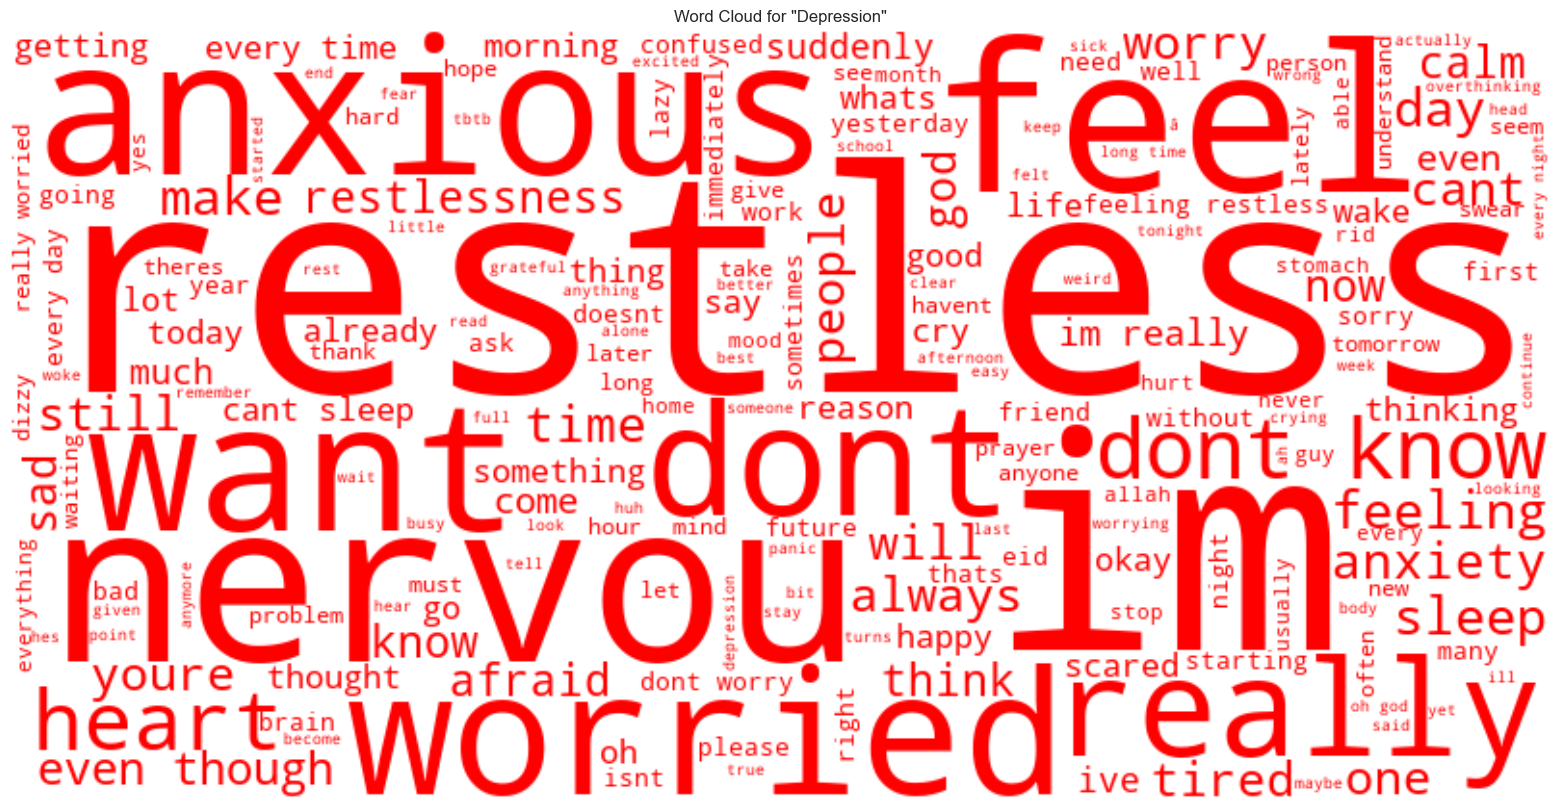

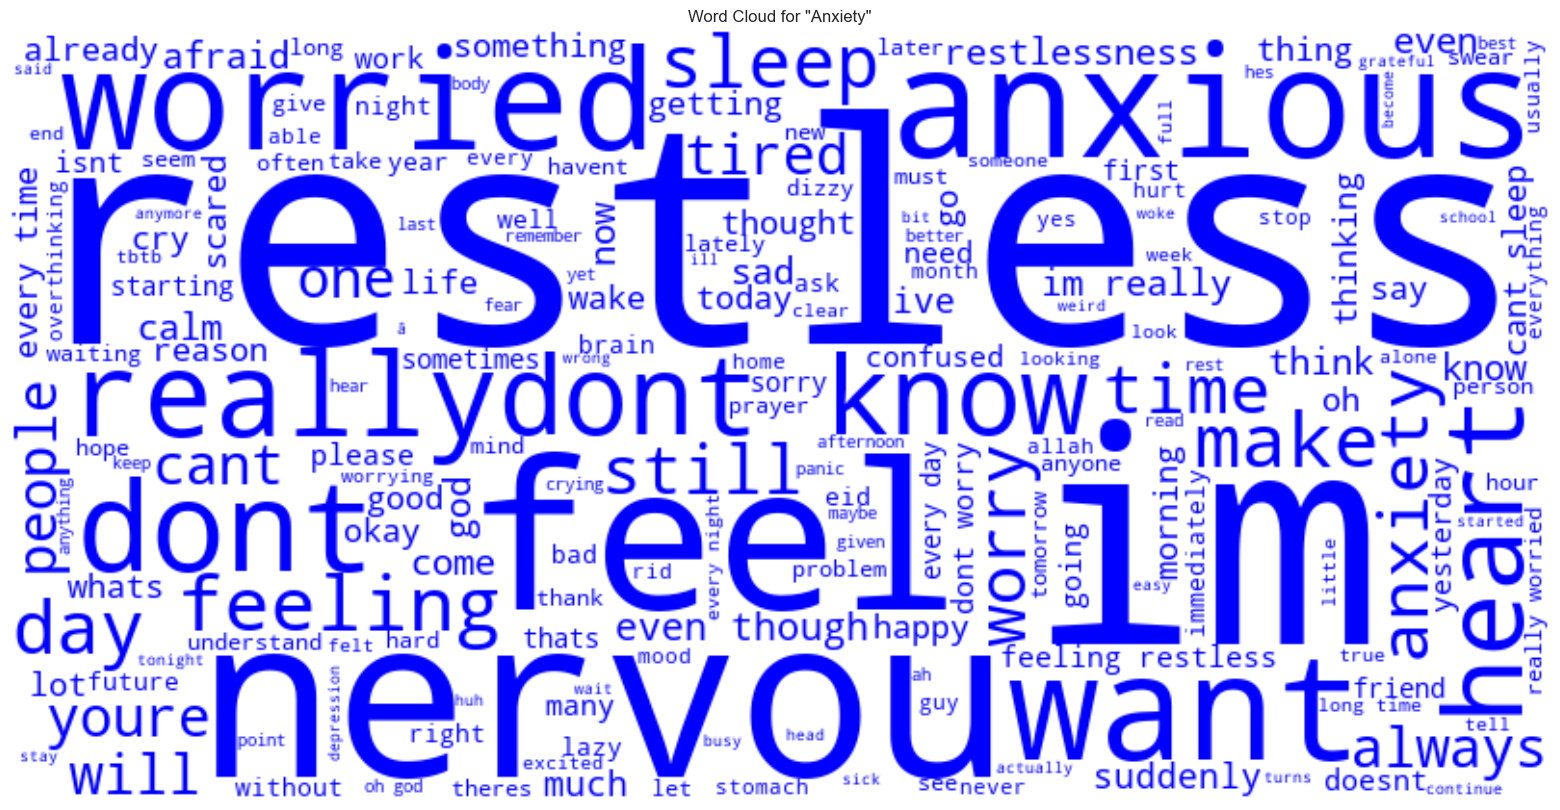

In [32]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

# Filter results for the topics 'depression' and 'anxiety'
depression_texts = results_df[results_df['topic'] == 'depression']['original_text']
anxiety_texts = results_df[results_df['topic'] == 'anxiety']['original_text']

# Function to generate a word cloud for a specific topic
def generate_wordcloud(text, color_func, title):
    wordcloud = WordCloud(width=800, height=400,
                          background_color='white',
                          stopwords=STOPWORDS,
                          color_func=color_func).generate(text)

    plt.figure(figsize=(20.5, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Concatenate the texts into a single string for each topic
depression_text = ' '.join(depression_texts)
anxiety_text = ' '.join(anxiety_texts)

# Generate the word cloud for 'depression' with a red theme
generate_wordcloud(depression_text, 
                   color_func=lambda *args, **kwargs: 'red', 
                   title='Word Cloud for "Depression"')

# Generate the word cloud for 'anxiety' with a blue theme
generate_wordcloud(anxiety_text, 
                   color_func=lambda *args, **kwargs: 'blue', 
                   title='Word Cloud for "Anxiety"')

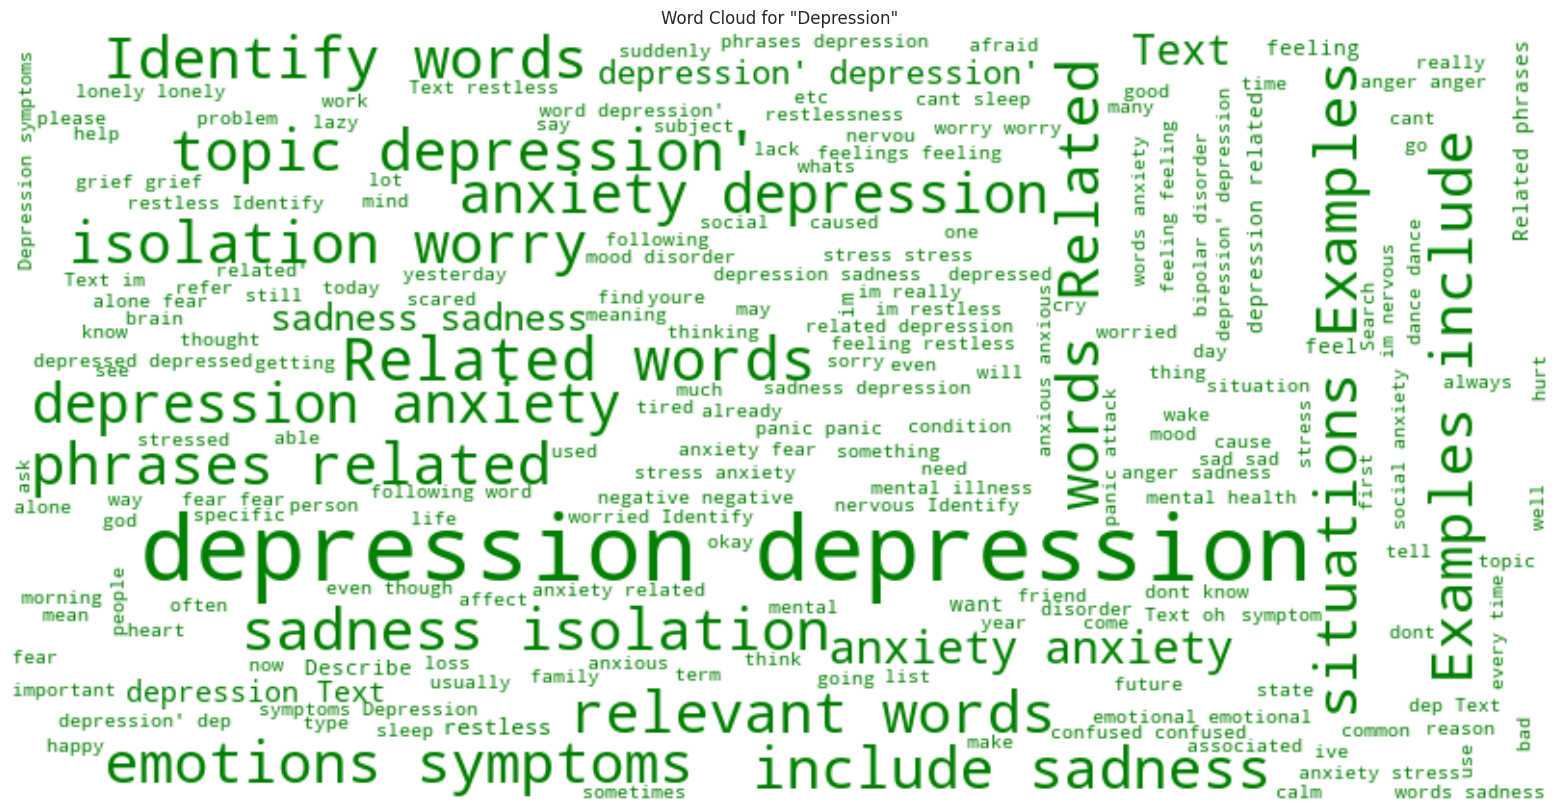

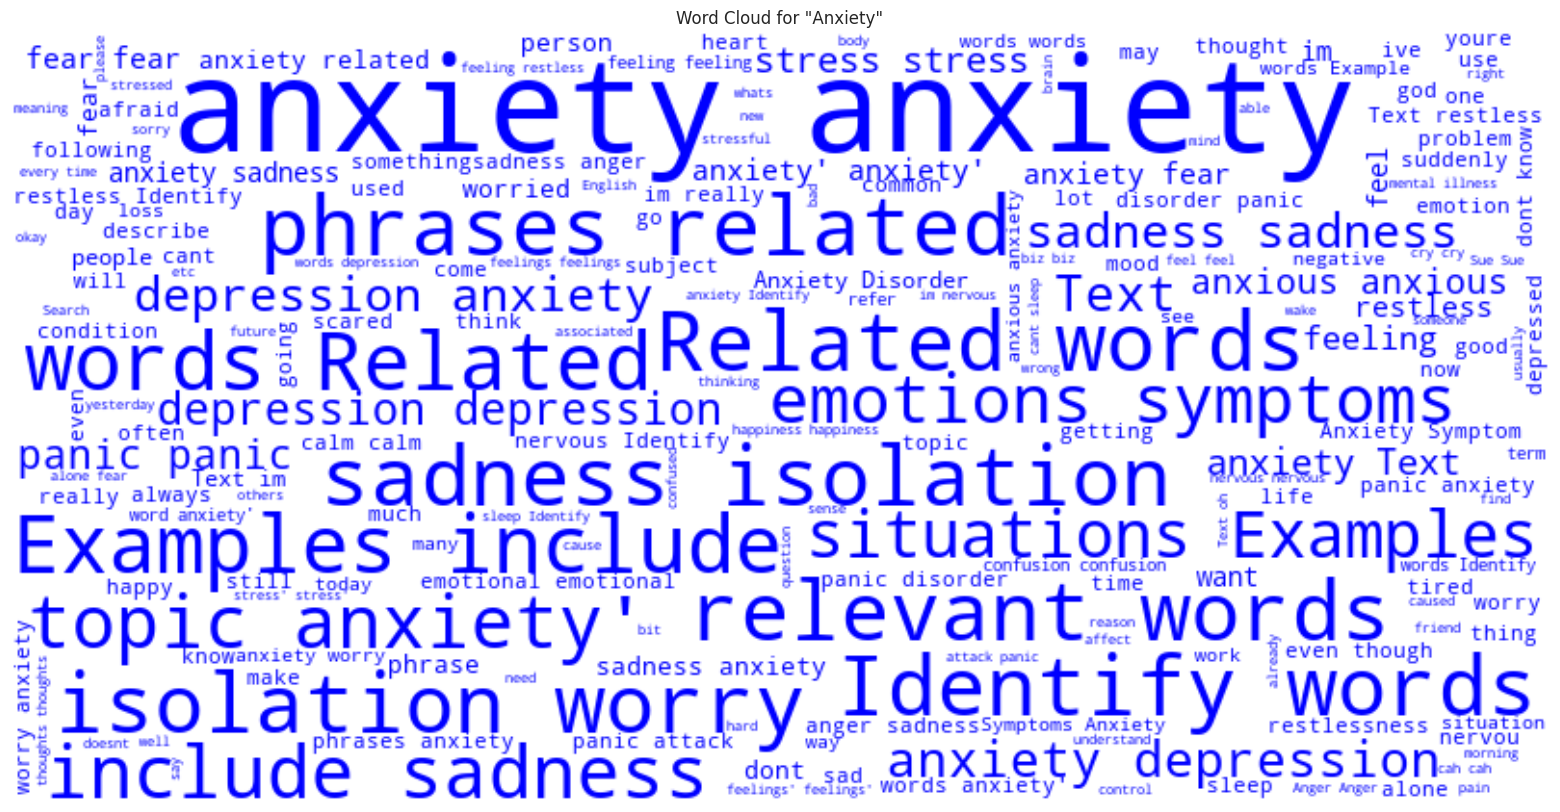

In [37]:
# Filter results for the topics 'depression' and 'anxiety'
depression_texts = results_df[results_df['topic'] == 'depression']['generated_text']
anxiety_texts = results_df[results_df['topic'] == 'anxiety']['generated_text']

# Function to generate a word cloud for a specific topic
def generate_wordcloud(text, color_func, title):
    wordcloud = WordCloud(width=800, height=400,
                          background_color='white',
                          stopwords=STOPWORDS,
                          color_func=color_func).generate(text)

    plt.figure(figsize=(20.5, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Concatenate the texts into a single string for each topic
depression_text = ' '.join(depression_texts)
anxiety_text = ' '.join(anxiety_texts)

# Generate the word cloud for 'depression' with a red theme
generate_wordcloud(depression_text, 
                   color_func=lambda *args, **kwargs: 'green', 
                   title='Word Cloud for "Depression"')

# Generate the word cloud for 'anxiety' with a blue theme
generate_wordcloud(anxiety_text, 
                   color_func=lambda *args, **kwargs: 'blue', 
                   title='Word Cloud for "Anxiety"')

In [35]:
# Save the results to a CSV file
results_df.to_csv("related_words_results.csv", index=False)
print("CSV file saved as 'related_words_results.csv'.")

CSV file saved as 'related_words_results.csv'.
